## Uždavinys 1

Naudodami krūties vėžio duomenų rinkinį, prognozuokite, ar navikas yra gerybinis ar piktybinis, naudodami logistinės regresijos modelį su polinominėmis ypatybėmis.

Duomenų rinkinys: (https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt 


In [46]:
# Nuskaityti duomenis
df = pd.read_csv('data.csv')

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Pašalinti nenaudinga stulpeli
X.drop(columns=['Unnamed: 32'], inplace=True)

# Mokymo ir testavimo rinkiniai
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelis
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Gauti prognozes testavimo rinkinyje
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Ivertinti modelio tiksluma
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Modelio tikslumas: 0.956140350877193


In [47]:
# Suformuoti painiavos matrica ir klasifikacijos ataskaita
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))

[[70  1]
 [ 4 39]]
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



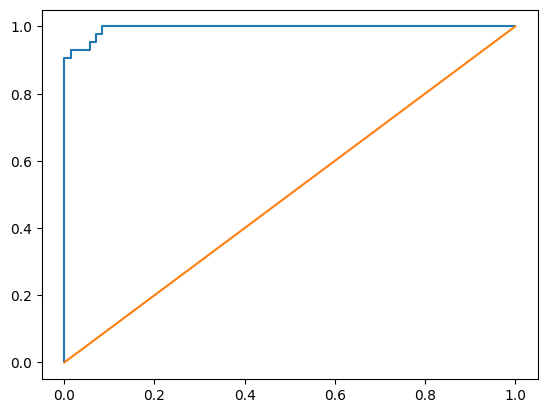

In [48]:
# ROC kreive

fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label="M")
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.show()

## Uždavinys 2

Naudojant širdies ligų duomenų rinkinį, prognozuokite, ar pacientas turi širdies ligą, naudodami logistinės regresijos modelį su polinominėmis ypatybėmis.

Duomenų rinkinys https://archive.ics.uci.edu/dataset/45/heart+disease


In [87]:
df = pd.read_csv('reprocessed_hungarian_data.csv', sep=' ')
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df.dropna(inplace=True)

X = df.drop('num', axis=1)
y = df['num']

# Mokymo ir testavimo rinkiniai
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Skalavimas duomenų
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelis
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Gauti prognozes testavimo rinkinyje
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Ivertinti modulio tiksluma
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)


0.6351351351351351


In [88]:
# Suformuoti painiavos matrica ir klasifikacijos ataskaita
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))

[[40  4  1  1  0]
 [ 5  4  0  1  0]
 [ 2  0  0  1  0]
 [ 3  2  2  3  0]
 [ 3  0  2  0  0]]
              precision    recall  f1-score   support

         0.0       0.75      0.87      0.81        46
         1.0       0.40      0.40      0.40        10
         2.0       0.00      0.00      0.00         3
         3.0       0.50      0.30      0.38        10
         4.0       0.00      0.00      0.00         5

    accuracy                           0.64        74
   macro avg       0.33      0.31      0.32        74
weighted avg       0.59      0.64      0.61        74



c:\Users\ostap\OneDrive\Рабочий стол\Mokymai\Duomenu_mokslas\mokymai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ostap\OneDrive\Рабочий стол\Mokymai\Duomenu_mokslas\mokymai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ostap\OneDrive\Рабочий стол\Mokymai\Duomenu_mokslas\mokymai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

In [90]:
# ROC kreive

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.show()

ValueError: multiclass format is not supported

## Uždavinys 3

Naudojant Pima Indians Diabetes duomenų rinkinį, prognozuokite, ar pacientas turi diabetą, naudodami logistinės regresijos modelį su polinominėmis ypatybėmis.

Duomenų rinkinys: Pima Indians Diabetes Database https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data

In [52]:
df = pd.read_csv('diabetes.csv')

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Mokymo ir testavimo rinkiniai
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Modelis
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Gauti prognozes testavimo rinkinyje
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Ivertinti modulio tiksluma
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.7291666666666666


In [60]:
# Suformuoti painiavos matrica ir klasifikacijos ataskaita
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))

[[107  15]
 [ 37  33]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       122
           1       0.69      0.47      0.56        70

    accuracy                           0.73       192
   macro avg       0.72      0.67      0.68       192
weighted avg       0.72      0.73      0.72       192



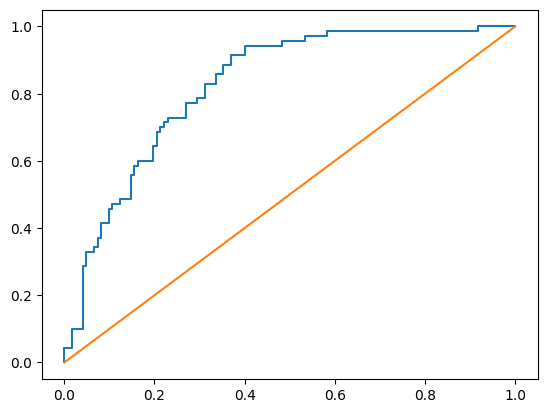

In [54]:
# ROC kreive

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.show()

## Uždavinys 4

Naudojant kraujo donorystės duomenų rinkinį, prognozuokite, ar donoras atliks kraujo donorystę, naudodami logistinės regresijos modelį su polinominėmis ypatybėmis.

Duomenų rinkinys: [Blood Transfusion Service Center Data Set](https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center)

In [73]:
df = pd.read_csv('transfusion_data.csv')
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Target']

X = df.drop('Target', axis=1)
y = df['Target']

# Mokymo ir testavimo rinkiniai
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Modelis
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Gauti prognozes testavimo rinkinyje
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Ivertinti modulio tiksluma
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.7967914438502673


In [74]:
# Suformuoti painiavos matrica ir klasifikacijos ataskaita
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))

[[145   3]
 [ 35   4]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.88       148
           1       0.57      0.10      0.17        39

    accuracy                           0.80       187
   macro avg       0.69      0.54      0.53       187
weighted avg       0.76      0.80      0.74       187



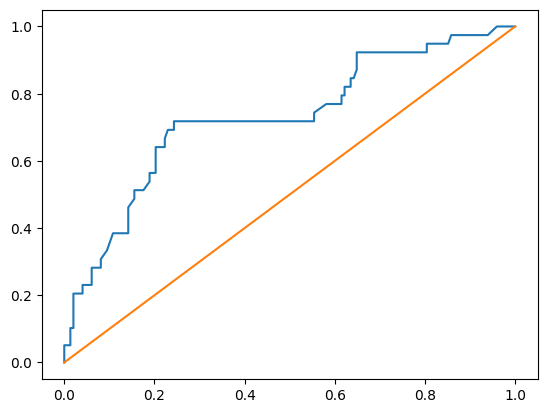

In [75]:
# ROC kreive

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.show()